In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\harri\OneDrive\Documents\Case study 1\Python\Housing Market\Melbourne_housing_FULL.csv")

In [3]:
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df = df.drop(['Lattitude','Longtitude','Landsize','Distance'], axis =1)

In [9]:
df['YearBuilt'] = df['YearBuilt'].astype(object)
df['Price'] = df['Price'].astype('int64')
df['Postcode'] = df['Postcode'].astype('int64')
df['Bedroom2'] = df['Bedroom2'].astype('int64')
df['Bathroom'] = df['Bathroom'].astype('int64')
df['Car'] = df['Car'].astype('int64')
df['BuildingArea'] = df['BuildingArea'].astype('int64')
df['Propertycount'] = df['Propertycount'].astype('int64')

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [62]:
Method = {'S':'Sold', 'SP':'Sold-Prior', 'PI': 'Passed-In', 'PN': 'Sold-Prior-Not-Disclosed', 'SN':'Sold-Not-Disclosed',
    'NB':'No-Bid', 'VB': 'Vendor-Bid', 'W': 'Withdrawn-Prior-To-Auction','SA':'Sold-After-Auction', 
    'SS':'Sold-After-Auction-Price-Not-Disclosed', 'N/A': 'Price-or-Highest-Bid-Not-Available'}

df['Method'] = df['Method'].replace(Method)

type = {'br':'Bedrooms', 'h':'House', 'u': 'Unit', 't': 'townhouse', 'dev site':'Development-Site', 'o res': 'Other-Residential'}
df['Type'] = df['Type'].replace(type)


In [12]:
df = df.rename(columns={'SellerG': 'Real_Estate_Agent'})

In [13]:
df['Year'] = df['Date'].dt.year

In [14]:
df['Year'] = df['Year'].astype(str)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8887 entries, 2 to 34856
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Suburb             8887 non-null   object        
 1   Address            8887 non-null   object        
 2   Rooms              8887 non-null   int64         
 3   Type               8887 non-null   object        
 4   Price              8887 non-null   int64         
 5   Method             8887 non-null   object        
 6   Real_Estate_Agent  8887 non-null   object        
 7   Date               8887 non-null   datetime64[ns]
 8   Postcode           8887 non-null   int64         
 9   Bedroom2           8887 non-null   int64         
 10  Bathroom           8887 non-null   int64         
 11  Car                8887 non-null   int64         
 12  BuildingArea       8887 non-null   int64         
 13  YearBuilt          8887 non-null   object        
 14  CouncilArea 

In [16]:
df

Suburb                      Address  Rooms       Type  \
2              Abbotsford              25 Bloomburg St      2      House   
4              Abbotsford                 5 Charles St      3      House   
6              Abbotsford                  55a Park St      4      House   
11             Abbotsford                 124 Yarra St      3      House   
14             Abbotsford                98 Charles St      2      House   
18             Abbotsford                10 Valiant St      2      House   
24             Abbotsford              40 Nicholson St      3      House   
25             Abbotsford          123/56 Nicholson St      2       Unit   
30             Abbotsford                16 William St      2      House   
32             Abbotsford                  42 Henry St      3      House   
35             Abbotsford                  78 Yarra St      3      House   
37             Abbotsford                42 Valiant St      2      House   
38             Abbotsford              3/72 Charles St      4      House   
42             Abbotsford           6/219 Nicholson St      2       Unit   
43             Abbotsford               52a William St      2      House   
44             Abbotsford                   49 Park St      2      House   
49             Abbotsford             48 Abbotsford St      3      House   
51             Abbotsford                  159 Park St      2      House   
56             Abbotsford               60 Stafford St      3      House   
57             Abbotsford              11/205 Gipps St      1       Unit   
58             Abbotsford                47 Studley St      2      House   
59             Abbotsford                  45 Yarra St      3      House   
61             Abbotsford             200 Nicholson St      2      House   
63             Abbotsford                27 Charles St      2      House   
66           Airport West                154 Halsey Rd      3  townhouse   
67           Airport West                50 Bedford St      3      House   
68           Airport West                50 Bedford St      3      House   
70           Airport West                   23 Hart St      2      House   
71           Airport West               1/80 Hawker St      3  townhouse   
72           Airport West             1/37 Hillside Gr      3      House   
73           Airport West             2/49 McIntosh St      2       Unit   
81           Airport West             11 Harrington Rd      6      House   
82           Airport West               2/252 Parer Rd      2  townhouse   
83           Airport West                 3/19 Hart St      2       Unit   
85           Airport West           2/62 Clydesdale Rd      2       Unit   
86           Airport West                  3 Deidre Ct      3      House   
88           Airport West                  13 Etzel St      3      House   
90           Airport West              1/43 Cameron St      3       Unit   
98           Airport West                 2/40 Earl St      3  townhouse   
100          Airport West                 180 Parer Rd      3      House   
103          Airport West                 174 Parer Rd      2      House   
104          Airport West               138 Victory Rd      3      House   
106          Airport West               6 Kittyhawk St      4      House   
108          Airport West             478 Fullarton Rd      3      House   
109          Airport West              144 Marshall Rd      3      House   
112          Airport West                 3/7 South Rd      3  townhouse   
113          Airport West                  37 North St      3  townhouse   
114          Airport West                10 Hilbert Rd      3      House   
129          Airport West                85 Roberts Rd      4      House   
133           Albert Park               105 Kerferd Rd      2      House   
135           Albert Park         112 Beaconsfield Pde      3      House   
136           Albert Park                 94 Graham St      3      

In [17]:
dd =df.groupby(['Regionname','Year','Type'])['Price'].sum().reset_index()

C:\Users\harri\AppData\Local\Temp\ipykernel_21532\1387026825.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dd, x='Year', y='Price', hue='Regionname',palette='Set1',ci=None)
C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Price'>

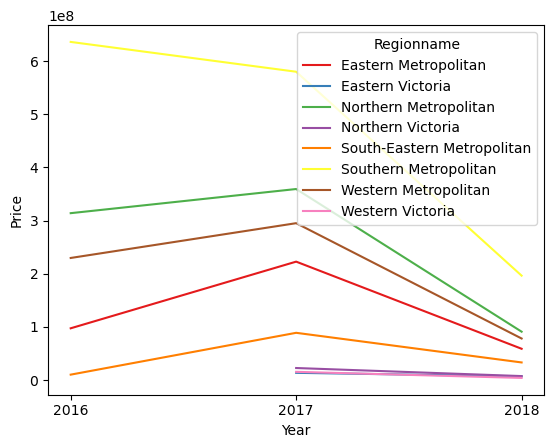

In [18]:
sns.lineplot(data=dd, x='Year', y='Price', hue='Regionname',palette='Set1',ci=None)

In [19]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Northern Victoria',
       'Eastern Victoria', 'Western Victoria'], dtype=object)

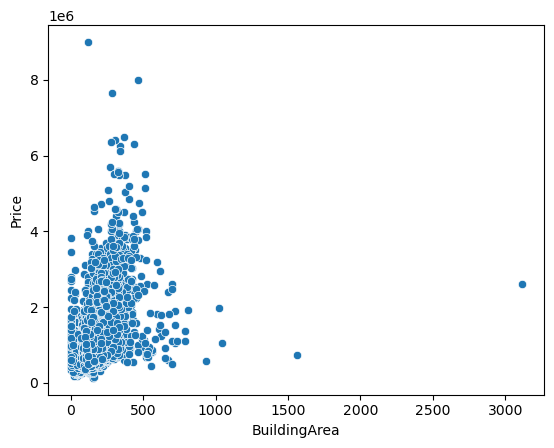

In [20]:
x =sns.scatterplot(x='BuildingArea', y='Price', data=df)
x.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

<Axes: xlabel='Rooms', ylabel='Price'>

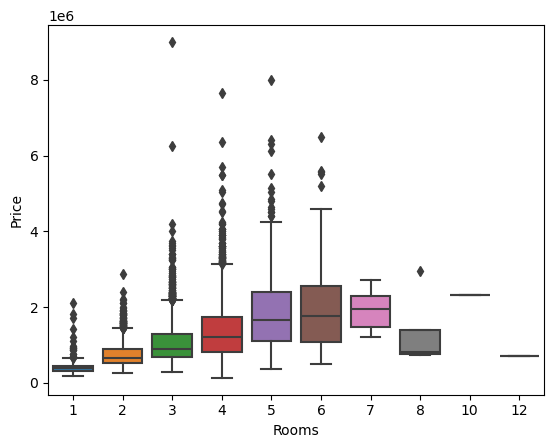

In [21]:
sns.boxplot(x='Rooms', y='Price', data=df)

<Axes: xlabel='Bedroom2', ylabel='Price'>

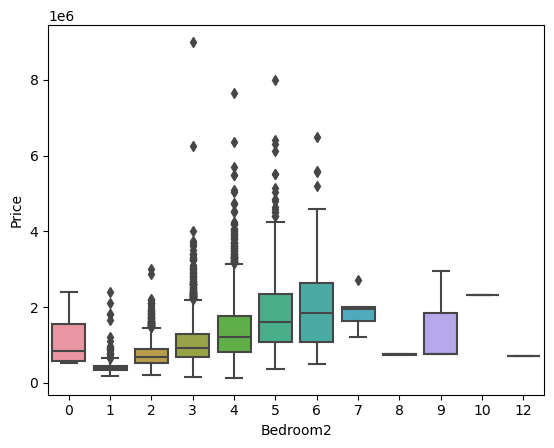

In [22]:
sns.boxplot(x='Bedroom2', y='Price', data=df)

<Axes: xlabel='Price', ylabel='Regionname'>

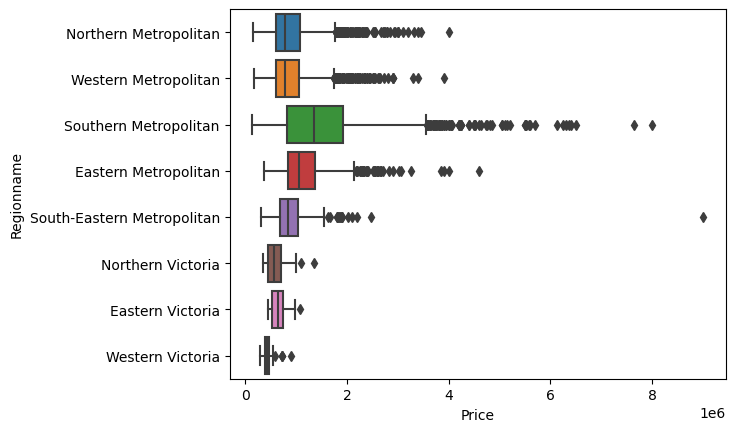

In [23]:
sns.boxplot(x='Price', y='Regionname', orient='h', data=df)

In [24]:
y =df[['BuildingArea', 'Bedroom2','Rooms', 'Price']].corr()

<Axes: >

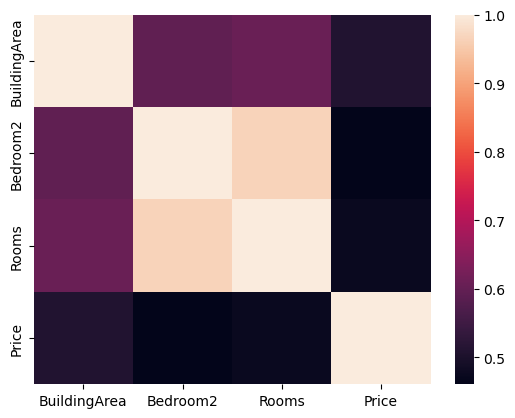

In [25]:
sns.heatmap(y)

In [26]:
c= df.groupby(['Regionname','Type'])['Price'].max().reset_index()

<Axes: xlabel='Price', ylabel='Regionname'>

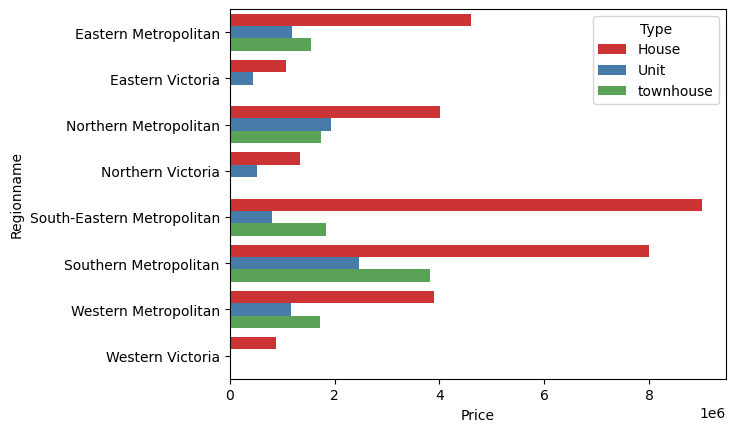

In [27]:
sns.barplot(data=c , x='Price', y='Regionname', hue='Type', palette='Set1')

In [28]:
r =df.groupby(['Regionname','Type'])['Price'].min().reset_index()

<Axes: xlabel='Price', ylabel='Regionname'>

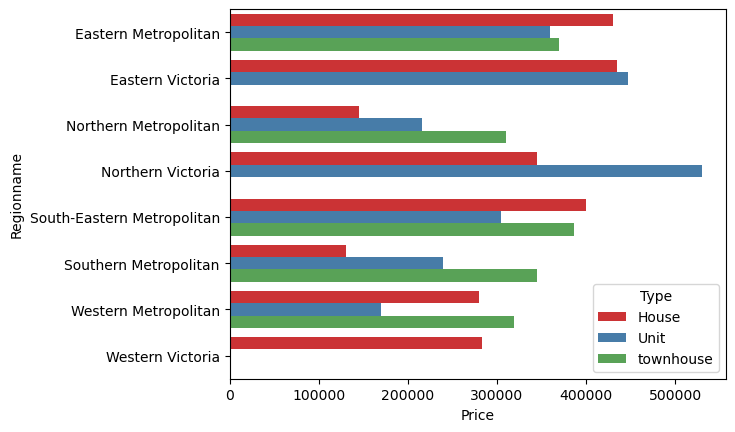

In [29]:
sns.barplot(data=r , x='Price', y='Regionname', hue='Type', palette='Set1')